# NBA 2023-24 Play by Play Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the play-by-play data
fp = '../data/processed/S2324_all_play-by-play.csv'
play_by_play_data = pd.read_csv(fp)

# Display the first few rows of the dataset
print(play_by_play_data.head())

# Check for missing values
print(play_by_play_data.isnull().sum())

# Summary statistics
print(play_by_play_data.describe())

shots = play_by_play_data[play_by_play_data['isFieldGoal'] == 1]

shots.to_csv('../data/processed/S2324_all_shots.csv', index=False)



       game_id  period  clock home  scoreHome away  scoreAway playerNameI  \
0  S2324-G0837       1  12:00  NYK        0.0  NOP        0.0         NaN   
1  S2324-G0837       1  12:00  NYK        NaN  NOP        NaN     J. Sims   
2  S2324-G0837       1  11:39  NYK        NaN  NOP        NaN  M. McBride   
3  S2324-G0837       1  11:38  NYK        NaN  NOP        NaN   B. Ingram   
4  S2324-G0837       1  11:36  NYK        NaN  NOP        NaN   B. Ingram   

  teamTricode                                  description   actionType  \
0         NaN            Start of 1st Period (7:42 PM EST)       period   
1         NYK  Jump Ball Sims vs. Valanciunas: Tip to Hart    Jump Ball   
2         NYK         MISS McBride 21' Step Back Jump Shot  Missed Shot   
3         NOP                 Ingram REBOUND (Off:0 Def:1)      Rebound   
4         NOP             Ingram Bad Pass Turnover (P1.T1)     Turnover   

               subType  xLegacy  yLegacy  shotDistance  isFieldGoal  shotVal  \
0     

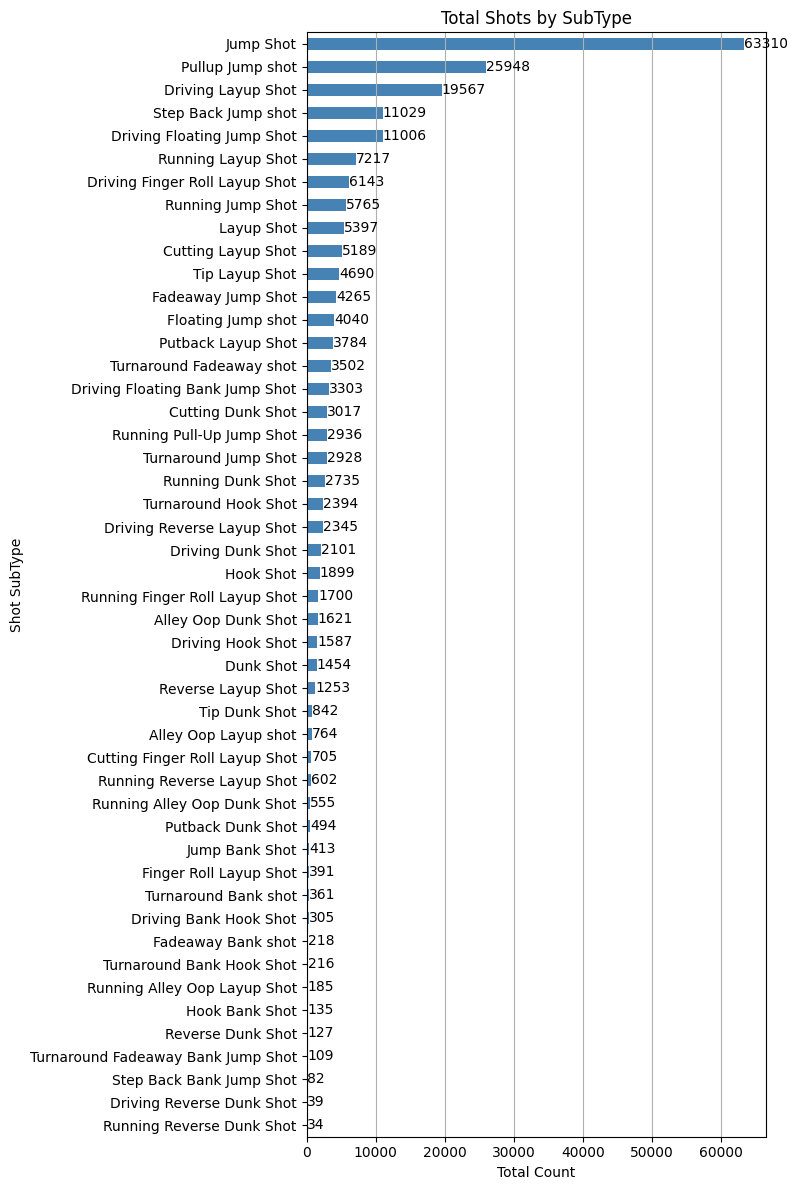

In [11]:
# Group the shots by subType and count the occurrences, then sort in ascending order
subtype_counts = shots['subType'].value_counts().sort_values(ascending=True)

# Create a horizontal bar plot for the total of each subType
plt.figure(figsize=(8, 12))
bars = subtype_counts.plot(kind='barh', color='steelblue')
plt.title('Total Shots by SubType')
plt.ylabel('Shot SubType')
plt.xlabel('Total Count')
plt.grid(axis='x')

# Add labels with the total number from each subtype
for bar in bars.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center')

plt.tight_layout()
plt.show()






In [17]:
shots['shotType'] = shots['subType'].str.split().str[-2:].str.join(' ').str.lower()






/var/folders/6m/88wxxv_j6vjbktrf88ghl0t80000gn/T/ipykernel_33874/1778126436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['shotType'] = shots['subType'].str.split().str[-2:].str.join(' ').str.lower()


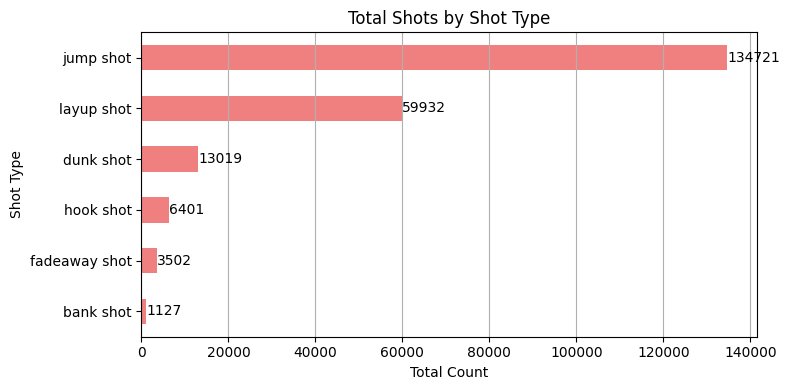

In [20]:
# Group the shots by shotType and count the occurrences
shot_type_counts = shots['shotType'].value_counts().sort_values(ascending=True)

# Create a horizontal bar plot for the total of each shotType
plt.figure(figsize=(8, 4))
bars = shot_type_counts.plot(kind='barh', color='lightcoral')
plt.title('Total Shots by Shot Type')
plt.ylabel('Shot Type')
plt.xlabel('Total Count')
plt.grid(axis='x')

# Add labels with the total number from each shotType
for bar in bars.patches:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             int(bar.get_width()), va='center')

plt.tight_layout()
plt.show()


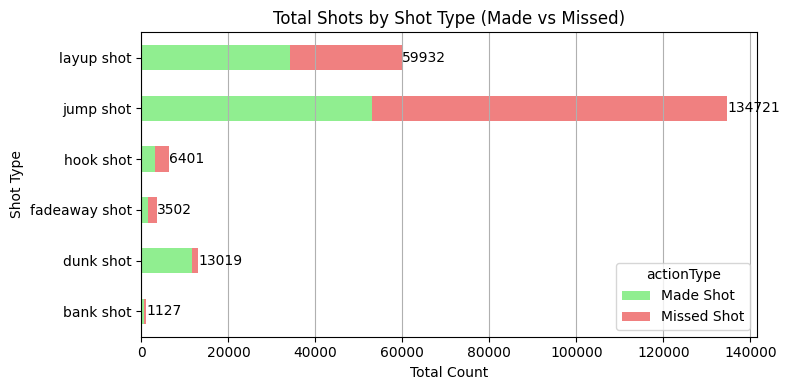

In [24]:
# Create a new DataFrame for the stacked bar chart
shot_type_made_missed = shots.groupby(['shotType', 'actionType']).size().unstack(fill_value=0)

# Create a stacked bar plot for the total of each shotType
plt.figure(figsize=(8, 4))
shot_type_made_missed.plot(kind='barh', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca())
plt.title('Total Shots by Shot Type (Made vs Missed)')
plt.ylabel('Shot Type')
plt.xlabel('Total Count')
plt.grid(axis='x')

# Add labels with the total number from each shotType
for index, value in enumerate(shot_type_made_missed.sum(axis=1)):
    plt.text(value + 0.1, index, int(value), va='center')

plt.tight_layout()
plt.show()


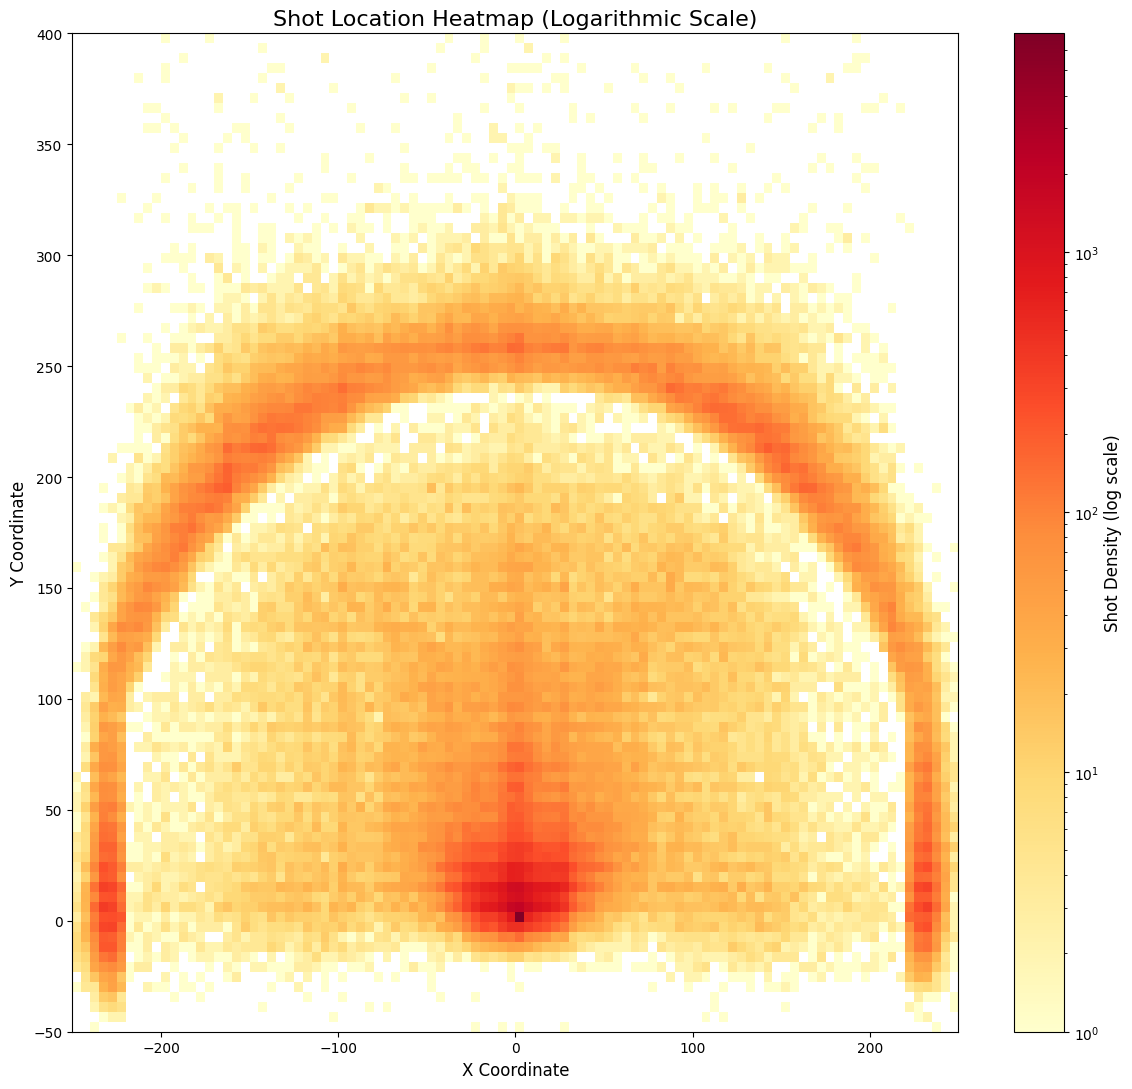

In [42]:
import seaborn as sns
import numpy as np
from matplotlib.colors import SymLogNorm, Normalize, LogNorm, PowerNorm

# Create a 2D histogram (heatmap) of shot locations
plt.figure(figsize=(12, 11))

# Calculate the 2D histogram
hist, xedges, yedges = np.histogram2d(shots['xLegacy'], shots['yLegacy'], bins=100, 
                                      range=[[-250, 250], [-50, 400]])

# Use pcolormesh with a logarithmic color scale
heatmap = plt.pcolormesh(xedges, yedges, hist.T, norm=LogNorm(), cmap='YlOrRd')

# Set the plot title and labels
plt.title('Shot Location Heatmap (Logarithmic Scale)', fontsize=16)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)

# Adjust the plot to show only the relevant area of the court
plt.xlim(-250, 250)
plt.ylim(-50, 400)

# Add a colorbar legend
cbar = plt.colorbar(heatmap)
cbar.set_label('Shot Density (log scale)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

